### Unsupervised learning: Cluster Analysis using K means

### Loading Libraries 

In [4]:
## Importing packages
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns


### Loading Data

In [5]:
# Import Data
from google.colab import files
uploaded = files.upload()

Saving retail.csv to retail.csv


In [8]:
# Reading the Dataset
retail = pd.read_csv('retail.csv' , encoding = 'unicode escape')


In [9]:
# Viewong top rows
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [10]:
# Dataset info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
 # changing invoicedate to date type 
retail. InvoiceDate = pd.to_datetime(retail.InvoiceDate)

In [12]:
# df info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
# df. describe
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
# removing rows where price is <= 0
retail = retail.loc[retail.UnitPrice > 0, :]

In [15]:
# Df Information
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539392 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539392 non-null  object        
 1   StockCode    539392 non-null  object        
 2   Description  539392 non-null  object        
 3   Quantity     539392 non-null  int64         
 4   InvoiceDate  539392 non-null  datetime64[ns]
 5   UnitPrice    539392 non-null  float64       
 6   CustomerID   406789 non-null  float64       
 7   Country      539392 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.0+ MB


In [16]:
# Missing values check null
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132603
Country             0
dtype: int64

In [17]:
# dropping nulls
retail = retail.dropna()

In [18]:
# Check nulls
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Preprocessing: Computing RFM by customer ID
* Recency: Number of days since last transaction
* Frequency: Total number of transactions 
* Monetory: Total amount spent

In [19]:
# creating sales variable
retail['Sales'] = retail.Quantity * retail.UnitPrice

## Monetory

In [20]:
# amount spent 
df =retail.groupby('CustomerID').Sales.sum()
df = df.reset_index()
df.head()

,CustomerID,Sales
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


## Frequency

In [21]:
freq = retail.groupby('CustomerID').InvoiceNo.count()
freq = freq.reset_index()
freq.columns = ['CustomerID' , 'Frequency']
freq.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [22]:
# Merging frequency and df
df =df.merge(freq, on = 'CustomerID', how = 'inner')
df.head()

,CustomerID,Sales,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


### Recency


In [23]:
# Earliest date in dataset
retail.InvoiceDate.min()

Timestamp('2010-01-12 08:26:00')

In [24]:
# Latest date in dataset
retail.InvoiceDate.max()

Timestamp('2011-12-10 17:19:00')

In [25]:
# days since transaction date
retail['Days'] = retail.InvoiceDate.max() - retail.InvoiceDate
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,697 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,697 days 08:53:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697 days 08:53:00


In [26]:
# Converting to number of days
retail.Days = retail.Days.dt.days
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,697
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,697
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697


In [27]:
# recency in days
rec = retail.groupby('CustomerID').Days.min()
rec = rec.reset_index()
rec.columns = ['CustomerID', 'Recency']
rec.head()

,CustomerID,Recency
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [28]:
# merge rec with df
df = df.merge(rec, on = 'CustomerID', how = 'inner')
df.head()

,CustomerID,Sales,Frequency,Recency
0,12346.0,0.00,2,326
1,12347.0,4310.00,182,40
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311


In [29]:
# df.info
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4371 entries, 0 to 4370
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4371 non-null   float64
 1   Sales       4371 non-null   float64
 2   Frequency   4371 non-null   int64  
 3   Recency     4371 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 170.7 KB


In [30]:
# dropping CustomerID
df = df.drop('CustomerID', axis = 1 )
df.head()

,Sales,Frequency,Recency
0,0.00,2,326
1,4310.00,182,40
2,1797.24,31,76
3,1757.55,73,19
4,334.40,17,311


### K means: Clustering analysis

In [31]:
# Standardization the variables
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.head(8)

,0,1,2
0,-0.231029,-0.391785,1.975121
1,0.293347,0.382618,-0.535337
2,-0.012368,-0.267020,-0.219335
3,-0.017197,-0.086326,-0.719671
4,-0.190344,-0.327252,1.843453
5,-0.043007,0.008323,-0.245669
6,-0.220201,-0.383181,0.904226
7,-0.099704,-0.150860,1.158783


In [32]:
# df with head function 
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.head()

,0,1,2
0,-0.231029,-0.391785,1.975121
1,0.293347,0.382618,-0.535337
2,-0.012368,-0.267020,-0.219335
3,-0.017197,-0.086326,-0.719671
4,-0.190344,-0.327252,1.843453


In [33]:
# Df with columns function
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.head(6)

,0,1,2
0,-0.231029,-0.391785,1.975121
1,0.293347,0.382618,-0.535337
2,-0.012368,-0.267020,-0.219335
3,-0.017197,-0.086326,-0.719671
4,-0.190344,-0.327252,1.843453
5,-0.043007,0.008323,-0.245669


In [34]:
# Create Clusters with K means computing
kmeans = KMeans(n_clusters = 3, random_state = 2)
k_pred = kmeans.fit(df_scaled)
k_pred


KMeans(n_clusters=3, random_state=2)

In [36]:
# Cluster controls
df_clust = pd.DataFrame(k_pred.cluster_centers_, columns= df.columns)
pd.set_option('precision', 3)
df_clust



,Sales,Frequency,Recency
0,0.008,0.049,-0.476
1,-0.179,-0.275,1.425
2,14.212,11.839,-0.835


In [37]:
# Precision
df_clust = pd.DataFrame(k_pred.cluster_centers_, columns= df.columns)
pd.set_option('precision', 6)
df_clust

,Sales,Frequency,Recency
0,0.007986,0.048769,-0.475587
1,-0.179383,-0.274816,1.425057
2,14.212184,11.838759,-0.835246


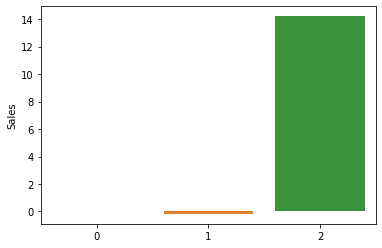

In [38]:
# Sales
sns.barplot(data = df_clust, x = df_clust.index, y = 'Sales')

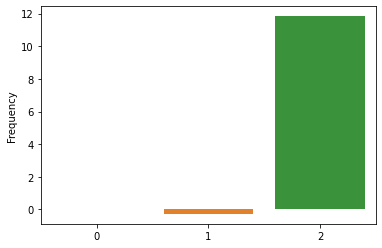

In [39]:
# Frequency 
sns.barplot(data = df_clust, x = df_clust.index, y = 'Frequency')

In [ ]:
# Detergents paper
sns.barplot(data = df_clust, x = df_clust.index, y = 'Detergents_Paper')

In [ ]:
# Delicassen
sns.barplot(data = df_clust, x = df_clust.index, y = 'Delicassen')

### Choosing K Elbow method

In [40]:
# Computing inertia
distortions = []
K = range(2,10)
for i in K:
  km = KMeans(n_clusters = i)
  km.fit(df_scaled)
  distortions.append(km.inertia_)

In [41]:
distortions

[8987.59396677282,
 5909.132150413203,
 4514.5745131392105,
 3440.202747853238,
 2757.9711248930844,
 2147.4662721002833,
 1801.2314080662516,
 1560.2563517074736]

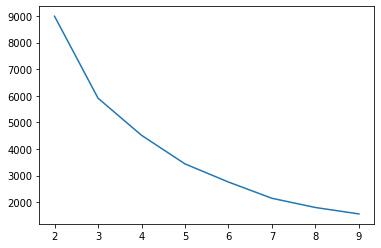

In [42]:
#plot inertia
plt.plot(K, distortions)

In [43]:
print(distortions)

[8987.59396677282, 5909.132150413203, 4514.5745131392105, 3440.202747853238, 2757.9711248930844, 2147.4662721002833, 1801.2314080662516, 1560.2563517074736]


In [52]:
 # Create Clusters with K means computing
kmeans = KMeans(n_clusters = 5, random_state = 1)
k_pred = kmeans.fit(df_scaled)
k_pred

KMeans(n_clusters=5, random_state=1)

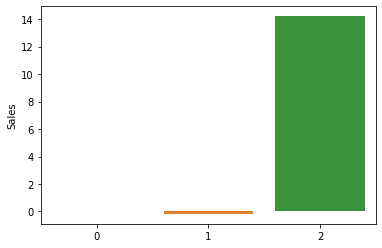

In [51]:
# Sales
sns.barplot(data = df_clust, x = df_clust.index, y = 'Sales')

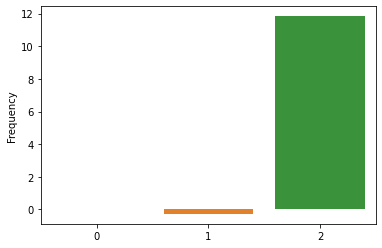

In [50]:
# Frequency 
sns.barplot(data = df_clust, x = df_clust.index, y = 'Frequency')

In [ ]:
# Detergents paper
sns.barplot(data = df_clust, x = df_clust.index, y = 'Detergents_Paper')